<a href="https://colab.research.google.com/github/kayahardie/PartIIIProject/blob/main/D_2_chain_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import numpy as np
import scipy as sp
import os
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.optimize import curve_fit
from scipy.optimize import minimize
import math

In [ ]:
chunk = 33
reshuff = 6

In [ ]:
temps = []
runs = ['a', 'b', 'c']
for i in range(41):
  start_temp = 45
  temp = start_temp - 0.5*i
  temps.append(temp)
print(temps)

[45.0, 44.5, 44.0, 43.5, 43.0, 42.5, 42.0, 41.5, 41.0, 40.5, 40.0, 39.5, 39.0, 38.5, 38.0, 37.5, 37.0, 36.5, 36.0, 35.5, 35.0, 34.5, 34.0, 33.5, 33.0, 32.5, 32.0, 31.5, 31.0, 30.5, 30.0, 29.5, 29.0, 28.5, 28.0, 27.5, 27.0, 26.5, 26.0, 25.5, 25.0]


In [ ]:
temp_dict = {}
end_times = []
start_times = []
for i in range(41):
  end_time = 10000000 + i*10000000 + 200000
  end_times.append(end_time)
  start_time = end_time + 400000
  temp_dict[start_time] = temps[i]
  start_times.append(start_time)
print(temp_dict)
print(start_times)
420200000
410600000

{10600000: 45.0, 20600000: 44.5, 30600000: 44.0, 40600000: 43.5, 50600000: 43.0, 60600000: 42.5, 70600000: 42.0, 80600000: 41.5, 90600000: 41.0, 100600000: 40.5, 110600000: 40.0, 120600000: 39.5, 130600000: 39.0, 140600000: 38.5, 150600000: 38.0, 160600000: 37.5, 170600000: 37.0, 180600000: 36.5, 190600000: 36.0, 200600000: 35.5, 210600000: 35.0, 220600000: 34.5, 230600000: 34.0, 240600000: 33.5, 250600000: 33.0, 260600000: 32.5, 270600000: 32.0, 280600000: 31.5, 290600000: 31.0, 300600000: 30.5, 310600000: 30.0, 320600000: 29.5, 330600000: 29.0, 340600000: 28.5, 350600000: 28.0, 360600000: 27.5, 370600000: 27.0, 380600000: 26.5, 390600000: 26.0, 400600000: 25.5, 410600000: 25.0}
[10600000, 20600000, 30600000, 40600000, 50600000, 60600000, 70600000, 80600000, 90600000, 100600000, 110600000, 120600000, 130600000, 140600000, 150600000, 160600000, 170600000, 180600000, 190600000, 200600000, 210600000, 220600000, 230600000, 240600000, 250600000, 260600000, 270600000, 280600000, 290600000, 

410600000

In [ ]:
counts = {}
for f in runs:
  counts[f] = {}
  print(f)
  path = f'/content/drive/MyDrive/CHUNK_{chunk}_132/reshuffle_{reshuff}/2_chains_NEW_2/stepdown_temp_45_25_{f}/results_trj.lammpstrj'
  for x in start_times:
    print(x)
    distances = []
    times = []
    for i in range(97):
        time = x + i * 100000
        times.append(time)
    #print(times)
    for i, t in enumerate(times):
      #print(t)
      x_coords, y_coords, z_coords = [], [], []
      start_processing = False
      with open(path, 'r') as file:
        for line in file:
            if line.startswith('ITEM: TIMESTEP'):
              timestep_value = next(file).strip()

              if timestep_value == str(t):
                start_processing = True
              else:
                start_processing = False
                continue

            if start_processing and line.startswith('ITEM: ATOMS id type mol x y z bP'):
              continue

            if start_processing:
              items = line.split()
              if len(items) >= 7:
                x_coords.append(float(items[3]))
                y_coords.append(float(items[4]))
                z_coords.append(float(items[5]))

      x_coords, y_coords, z_coords = np.array(x_coords), np.array(y_coords), np.array(z_coords)
      coordinates = np.column_stack((x_coords, y_coords, z_coords))

      chunk_size = 132
      num_chunks = len(coordinates) // chunk_size

      # Reshape coordinates into two sets
      coordinates_reshaped = coordinates[:num_chunks * chunk_size].reshape((num_chunks, chunk_size, 3))
      #print(coordinates_reshaped)
      count_distances_less_than_1 = 0

      # Iterate over each atom in the first set
      for k in range(chunk_size):
          # Extract coordinates for the kth atom in the first set
          coord_k_first_set = coordinates_reshaped[0, k, :]
          # Iterate over each atom in the second set
          for m in range(chunk_size):
              # Extract coordinates for the mth atom in the second set
              coord_m_second_set = coordinates_reshaped[1, m, :]


              # Calculate distances along x, y, and z directions
              distance_x = np.abs(coord_k_first_set[0] - coord_m_second_set[0])
              distance_y = np.abs(coord_k_first_set[1] - coord_m_second_set[1])
              distance_z = np.abs(coord_k_first_set[2] - coord_m_second_set[2])
              #print(distance_x)
              if distance_x > 60:
                  distance_x -= 60
              if distance_y > 60:
                    distance_y -= 60
              if distance_z > 60:
                    distance_z -= 60

              distance = math.sqrt(distance_x**2 + distance_y**2 + distance_z**2)
              #print(distance)
              if distance <= math.sqrt(3):
                  count_distances_less_than_1 += 1
      #print(count_distances_less_than_1)
      counts[f][t] = count_distances_less_than_1
      #print(counts)

a
10600000
20600000
30600000
40600000
50600000
60600000
70600000
80600000
90600000
100600000
110600000
120600000
130600000
140600000
150600000
160600000
170600000
180600000
190600000
200600000
210600000
220600000
230600000
240600000
250600000
260600000
270600000
280600000
290600000
300600000
310600000
320600000
330600000
340600000
350600000
360600000
370600000
380600000
390600000
400600000
410600000
b
10600000
20600000
30600000
40600000
50600000
60600000
70600000
80600000
90600000
100600000
110600000
120600000
130600000
140600000
150600000
160600000
170600000
180600000
190600000
200600000
210600000
220600000
230600000
240600000
250600000
260600000
270600000
280600000
290600000
300600000
310600000
320600000
330600000
340600000
350600000
360600000
370600000
380600000
390600000
400600000
410600000
c
10600000
20600000
30600000
40600000
50600000
60600000
70600000
80600000
90600000
100600000
110600000
120600000
130600000
140600000
150600000
160600000
170600000
180600000
190600000
200600000
2

In [ ]:
path = f'/content/drive/MyDrive/CHUNK_{chunk}_132/reshuffle_{reshuff}/2_chains_NEW_2/GRAPH_45_25'
%cd $path
file_path = 'counts_data.txt'

with open(file_path, 'w') as file:
    file.write(f'{counts}')


/content/drive/MyDrive/CHUNK_33_132/reshuffle_6/2_chains_NEW_2/GRAPH_45_25


In [ ]:
print(counts)

{'a': {10600000: 398, 10700000: 171, 10800000: 111, 10900000: 247, 11000000: 0, 11100000: 0, 11200000: 0, 11300000: 0, 11400000: 0, 11500000: 0, 11600000: 0, 11700000: 0, 11800000: 0, 11900000: 0, 12000000: 0, 12100000: 0, 12200000: 0, 12300000: 0, 12400000: 0, 12500000: 0, 12600000: 0, 12700000: 0, 12800000: 316, 12900000: 179, 13000000: 0, 13100000: 0, 13200000: 0, 13300000: 0, 13400000: 0, 13500000: 0, 13600000: 0, 13700000: 0, 13800000: 0, 13900000: 0, 14000000: 0, 14100000: 0, 14200000: 0, 14300000: 0, 14400000: 0, 14500000: 0, 14600000: 0, 14700000: 0, 14800000: 0, 14900000: 0, 15000000: 0, 15100000: 0, 15200000: 0, 15300000: 3, 15400000: 0, 15500000: 0, 15600000: 0, 15700000: 0, 15800000: 0, 15900000: 0, 16000000: 0, 16100000: 0, 16200000: 0, 16300000: 0, 16400000: 0, 16500000: 0, 16600000: 0, 16700000: 0, 16800000: 0, 16900000: 0, 17000000: 0, 17100000: 14, 17200000: 0, 17300000: 7, 17400000: 0, 17500000: 0, 17600000: 0, 17700000: 0, 17800000: 0, 17900000: 0, 18000000: 0, 18100

In [ ]:
bound = {}
chunk_size = 97

for key, inner_dict in counts.items():
    values = list(inner_dict.values())
    bound[key] = {}
    for i in range(0, len(values), chunk_size):
        index = int(i/97)
        time = start_times[index]
        chunks = values[i:i + chunk_size]
        count_above_zero = sum(1 for value in chunks if value > 0)
        bound[key][time] = count_above_zero*100/97


path = f'/content/drive/MyDrive/CHUNK_{chunk}_132/reshuffle_{reshuff}/2_chains_NEW_2/GRAPH_45_25'
%cd $path
file_path = 'bound_data.txt'

with open(file_path, 'w') as file:
    file.write(f'{bound}')

/content/drive/MyDrive/CHUNK_33_132/reshuffle_6/2_chains_NEW_2/GRAPH_45_25


In [ ]:
transposed_bound = {}
for outer_key, inner_dict in bound.items():
    for inner_key, value in inner_dict.items():
        if inner_key not in transposed_bound:
            transposed_bound[inner_key] = {}
        transposed_bound[inner_key][outer_key] = value

path = f'/content/drive/MyDrive/CHUNK_{chunk}_132/reshuffle_{reshuff}/2_chains_NEW_2/GRAPH_45_25'
%cd $path
file_path = 'transposed_bound_data.txt'

with open(file_path, 'w') as file:
    file.write(f'{transposed_bound}')


/content/drive/MyDrive/CHUNK_33_132/reshuffle_6/2_chains_NEW_2/GRAPH_45_25


In [ ]:
averages = {}
std ={}
for outer_key, inner_dict in transposed_bound.items():
    values = []
    for inner_key, value in inner_dict.items():
      values.append(value)
    averages[outer_key] = sum(values)/len(values)
    std[outer_key] = np.std(values)

print(averages)


path = f'/content/drive/MyDrive/CHUNK_{chunk}_132/reshuffle_{reshuff}/2_chains_NEW_2/GRAPH_45_25'
%cd $path
file_path = 'average_std_data.txt'

with open(file_path, 'w') as file:
    file.write(f'{averages}\n{std}')


{10600000: 7.903780068728523, 20600000: 4.810996563573883, 30600000: 6.529209621993128, 40600000: 6.529209621993128, 50600000: 4.467353951890034, 60600000: 6.8728522336769755, 70600000: 3.780068728522336, 80600000: 2.4054982817869415, 90600000: 3.092783505154639, 100600000: 5.154639175257731, 110600000: 4.810996563573883, 120600000: 14.0893470790378, 130600000: 7.216494845360825, 140600000: 2.74914089347079, 150600000: 12.714776632302408, 160600000: 11.68384879725086, 170600000: 14.0893470790378, 180600000: 22.336769759450174, 190600000: 57.7319587628866, 200600000: 16.83848797250859, 210600000: 51.546391752577314, 220600000: 29.89690721649485, 230600000: 60.824742268041234, 240600000: 65.29209621993127, 250600000: 80.75601374570446, 260600000: 92.78350515463917, 270600000: 100.0, 280600000: 71.8213058419244, 290600000: 76.28865979381443, 300600000: 100.0, 310600000: 100.0, 320600000: 100.0, 330600000: 100.0, 340600000: 100.0, 350600000: 100.0, 360600000: 100.0, 370600000: 100.0, 38060

[45.0, 44.5, 44.0, 43.5, 43.0, 42.5, 42.0, 41.5, 41.0, 40.5, 40.0, 39.5, 39.0, 38.5, 38.0, 37.5, 37.0, 36.5, 36.0, 35.5, 35.0, 34.5, 34.0, 33.5, 33.0, 32.5, 32.0, 31.5, 31.0, 30.5, 30.0, 29.5, 29.0, 28.5, 28.0, 27.5, 27.0, 26.5, 26.0, 25.5, 25.0]
[7.903780068728523, 4.810996563573883, 6.529209621993128, 6.529209621993128, 4.467353951890034, 6.8728522336769755, 3.780068728522336, 2.4054982817869415, 3.092783505154639, 5.154639175257731, 4.810996563573883, 14.0893470790378, 7.216494845360825, 2.74914089347079, 12.714776632302408, 11.68384879725086, 14.0893470790378, 22.336769759450174, 57.7319587628866, 16.83848797250859, 51.546391752577314, 29.89690721649485, 60.824742268041234, 65.29209621993127, 80.75601374570446, 92.78350515463917, 100.0, 71.8213058419244, 76.28865979381443, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
34.37698760911426
0.25930653945862364
/content/drive/MyDrive/CHUNK_33_132/reshuffle_6/2_chains_NEW_2/GRAPH_45_25


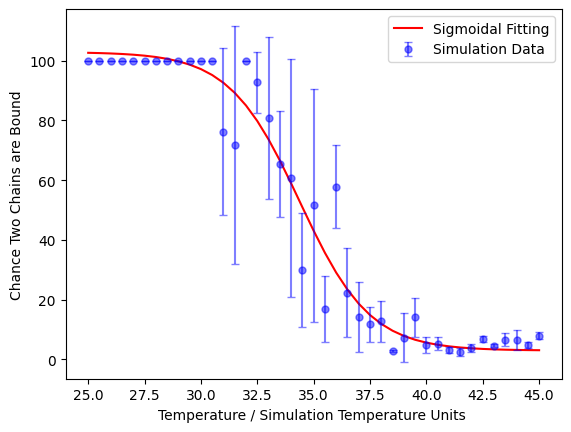

In [ ]:
def sigmoid(x, B, C, D):
    return 100 / (1 + np.exp(B * (x - C))) + D

average_list = []
temp_list = []
std_list = []
for key, value in averages.items():
  temp = temp_dict[key]
  average_list.append(value)
  temp_list.append(temp)
  std_val = std[key]
  std_list.append(std_val)

p0 =[1, 34, 2]

print(temp_list)
print(average_list)
popt, pcov = curve_fit(sigmoid, temp_list, average_list)
plt.plot(temp_list, sigmoid(temp_list, *popt), 'r-', label='Sigmoidal Fitting')
plt.errorbar(temp_list, average_list, yerr=std_list, color='blue', alpha=0.5, capsize=3, fmt='o', markersize=5, label='Simulation Data')
transition_temp = popt[1]
transition_temp_error = math.sqrt(pcov[1,1])
print(transition_temp)
#transition_temps.append(transition_temp)
plt.xlabel('Temperature / Simulation Temperature Units ')
plt.ylabel('Chance Two Chains are Bound')
plt.legend()
#plt.title('Original Sequence')
path = f'/content/drive/MyDrive/CHUNK_{chunk}_132/reshuffle_{reshuff}/2_chains_NEW_2/GRAPH_45_25'
save_path = 'sigmoid_fit.png'
plt.savefig(save_path)
plt.show


print(transition_temp_error)
path = f'/content/drive/MyDrive/CHUNK_{chunk}_132/reshuffle_{reshuff}/2_chains_NEW_2/GRAPH_45_25'
%cd $path
file_path = 'transition_temp_data.txt'

file_text = f'Transition Temperature: {transition_temp}\nError: {transition_temp_error} '
with open(file_path, 'w') as file:
    file.write(f'{file_text}')


[45.0, 44.5, 44.0, 43.5, 43.0, 42.5, 42.0, 41.5, 41.0, 40.5, 40.0, 39.5, 39.0, 38.5, 38.0, 37.5, 37.0, 36.5, 36.0, 35.5, 35.0, 34.5, 34.0, 33.5, 33.0, 32.5, 32.0, 31.5, 31.0, 30.5, 30.0, 29.5, 29.0, 28.5, 28.0, 27.5, 27.0, 26.5, 26.0, 25.5, 25.0]
[7.903780068728523, 4.810996563573883, 6.529209621993128, 6.529209621993128, 4.467353951890034, 6.8728522336769755, 3.780068728522336, 2.4054982817869415, 3.092783505154639, 5.154639175257731, 4.810996563573883, 14.0893470790378, 7.216494845360825, 2.74914089347079, 12.714776632302408, 11.68384879725086, 14.0893470790378, 22.336769759450174, 57.7319587628866, 16.83848797250859, 51.546391752577314, 29.89690721649485, 60.824742268041234, 65.29209621993127, 80.75601374570446, 92.78350515463917, 100.0, 71.8213058419244, 76.28865979381443, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
34.28755049675658
0.2785520463635972
/content/drive/MyDrive/CHUNK_33_132/reshuffle_6/2_chains_NEW_2/GRAPH_45_25


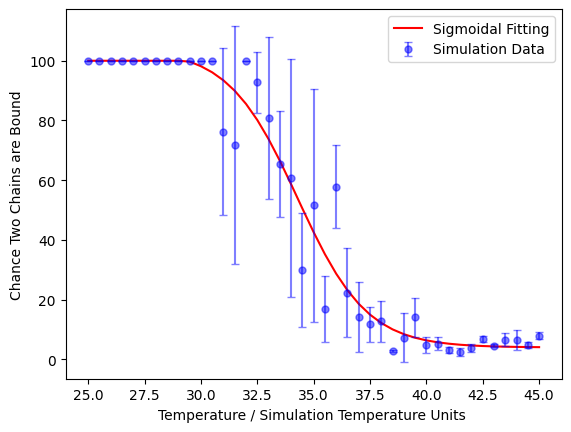

In [ ]:
def sigmoid(x, B, C, D):
    return np.clip(100 / (1 + np.exp(B * (x - C))) + D, 0, 100)

average_list = []
temp_list = []
std_list = []
for key, value in averages.items():
  temp = temp_dict[key]
  average_list.append(value)
  temp_list.append(temp)
  std_val = std[key]
  std_list.append(std_val)

p0 =[1, 34, 2]

print(temp_list)
print(average_list)
popt, pcov = curve_fit(sigmoid, temp_list, average_list)
plt.plot(temp_list, sigmoid(temp_list, *popt), 'r-', label='Sigmoidal Fitting')
plt.errorbar(temp_list, average_list, yerr=std_list, color='blue', alpha=0.5, capsize=3, fmt='o', markersize=5, label='Simulation Data')
transition_temp = popt[1]
transition_temp_error = math.sqrt(pcov[1,1])
print(transition_temp)
#transition_temps.append(transition_temp)
plt.xlabel('Temperature / Simulation Temperature Units ')
plt.ylabel('Chance Two Chains are Bound')
plt.legend()
#plt.title('Original Sequence')
path = f'/content/drive/MyDrive/CHUNK_{chunk}_132/reshuffle_{reshuff}/2_chains_NEW_2/GRAPH_45_25'
save_path = 'sigmoid_fit_np_clip.png'
plt.savefig(save_path)
plt.show


print(transition_temp_error)
path = f'/content/drive/MyDrive/CHUNK_{chunk}_132/reshuffle_{reshuff}/2_chains_NEW_2/GRAPH_45_25'
%cd $path
file_path = 'transition_temp_data_np_clip.txt'

file_text = f'Transition Temperature: {transition_temp}\nError: {transition_temp_error} '
with open(file_path, 'w') as file:
    file.write(f'{file_text}')

In [ ]:
##END

In [ ]:
def sigmoid(x, B, C, D):
    return 100 / (1 + np.exp(-B * (x - C))) + D

transition_temps = []
for f in runs:
  average_list = []
  temp_list = []
  for x in start_times:
    average = averages[x]
    temp = temp_dict[x]
    average_list.append(average)
    temp_list.append(temp)
  p0 =[1, 34, 2]
  popt, pcov = curve_fit(sigmoid, temp_list, average_list)
  plt.plot(temp_list, sigmoid(temp_list, *popt), 'r-', label='Sigmoidal Fitting')
  plt.scatter(temp_list, average_list)
  transition_temp = popt[3]
  transition_temps.append(transition_temp)
plt.xlabel('Distance Between Two Chains / Lattice Units')
plt.ylabel('Temperature / Simulation Temperature Units ')
plt.legend()
path = f'/content/drive/MyDrive/A_132/2_chains/GRAPH_45_25'
save_path = 'sigmoid_fit.png'
plt.save(save_path)
plt.show

TypeError: Improper input: func input vector length N=3 must not exceed func output vector length M=1

In [ ]:
average_transition_temp = sum(transition_temps) / len(transition_temps)
std_dev_transition_temp = np.std(transition_temps)

formatted_output = f'Transition Temperatures: {transition_temps}\n Average: {average_transition_temp}\n Standard Deviation: {average_transition_temp}'
  with open(f'KEY_DATA.txt', 'w') as file:
      file.write(formatted_output)

